# SNS Scraping Lab - 2016707079 하상천


In [1]:
!pip install twitter

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import twitter
import json

## Initialising Twitter API

To use Twitter API, we have to initialise it using the tokens and the authentication keys that has been provided. 

In [3]:
# Copy and paste the keys and tokens that you have acquired
CONSUMER_KEY = 'KSl5I1Ta970LrFRo70RZJS6RC'
CONSUMER_SECRET = 'pumBJu35LoqJBXpRPc2iJq1aPWQj7lz8FbXa4MOC9xGZgOmEZn'
OAUTH_TOKEN = '900198409-n8jwPPp0PG40IuGvICBggDIBBxlQMVR4DYJChoVm'
OAUTH_TOKEN_SECRET = 'IH4llnqkvlqAOCvPijK3ByAm2iOrP5WMq5LKgwhoQXX1n'

In [4]:
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

print(twitter_api)

## Trending Topics

By using Twitter API's **trends.place** function, we can gather information regarding the trending topics in a particular place that we want to look at. For this example, we will take a look at the trending topics of the entire world and the USA. 

* Entire world ID: 1
* USA ID: 23424977

In [5]:
WORLD_WOE_ID = 1      
US_WOE_ID = 23424977

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

In [6]:
len(world_trends)

1

In [7]:
print(world_trends)

[{'trends': [{'name': '#ProvaDoFazendeiro', 'url': 'http://twitter.com/search?q=%23ProvaDoFazendeiro', 'promoted_content': None, 'query': '%23ProvaDoFazendeiro', 'tweet_volume': 190202}, {'name': '伊藤健太郎', 'url': 'http://twitter.com/search?q=%E4%BC%8A%E8%97%A4%E5%81%A5%E5%A4%AA%E9%83%8E', 'promoted_content': None, 'query': '%E4%BC%8A%E8%97%A4%E5%81%A5%E5%A4%AA%E9%83%8E', 'tweet_volume': 113756}, {'name': '#FicaLipe', 'url': 'http://twitter.com/search?q=%23FicaLipe', 'promoted_content': None, 'query': '%23FicaLipe', 'tweet_volume': 82716}, {'name': 'Hugo', 'url': 'http://twitter.com/search?q=Hugo', 'promoted_content': None, 'query': 'Hugo', 'tweet_volume': 147489}, {'name': '#SM_PROTECT_CHANYEOL', 'url': 'http://twitter.com/search?q=%23SM_PROTECT_CHANYEOL', 'promoted_content': None, 'query': '%23SM_PROTECT_CHANYEOL', 'tweet_volume': 279707}, {'name': '#BB22', 'url': 'http://twitter.com/search?q=%23BB22', 'promoted_content': None, 'query': '%23BB22', 'tweet_volume': 102749}, {'name': '#Sh

In [8]:
world_trends[0].keys()

dict_keys(['trends', 'as_of', 'created_at', 'locations'])

In [9]:
from pandas.io.json import json_normalize
json_normalize(world_trends[0])

<ipython-input-9-a286c4b48f62>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  json_normalize(world_trends[0])


,trends,as_of,created_at,locations
0,"[{'name': '#ProvaDoFazendeiro', 'url': 'http:/...",2020-10-29T06:29:34Z,2020-10-27T20:36:34Z,"[{'name': 'Worldwide', 'woeid': 1}]"


In [10]:
json_normalize(world_trends[0], 'trends')

<ipython-input-10-97d7c817a412>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  json_normalize(world_trends[0], 'trends')


,name,url,promoted_content,query,tweet_volume
0,#ProvaDoFazendeiro,http://twitter.com/search?q=%23ProvaDoFazendeiro,None,%23ProvaDoFazendeiro,190202.0
1,伊藤健太郎,http://twitter.com/search?q=%E4%BC%8A%E8%97%A4...,None,%E4%BC%8A%E8%97%A4%E5%81%A5%E5%A4%AA%E9%83%8E,113756.0
2,#FicaLipe,http://twitter.com/search?q=%23FicaLipe,None,%23FicaLipe,82716.0
3,Hugo,http://twitter.com/search?q=Hugo,None,Hugo,147489.0
4,#SM_PROTECT_CHANYEOL,http://twitter.com/search?q=%23SM_PROTECT_CHAN...,None,%23SM_PROTECT_CHANYEOL,279707.0
5,#BB22,http://twitter.com/search?q=%23BB22,None,%23BB22,102749.0
6,#Showtime11thPower,http://twitter.com/search?q=%23Showtime11thPower,None,%23Showtime11thPower,21019.0
7,Wine,http://twitter.com/search?q=Wine,None,Wine,92008.0
8,Renê,http://twitter.com/search?q=Ren%C3%AA,None,Ren%C3%AA,49671.0
9,Neneca,http://twitter.com/search?q=Neneca,None,Neneca,127672.0


The same applies for trending topics in USA.

In [11]:
len(us_trends)

1

In [133]:
#print(us_trends)

In [13]:
us_trends[0].keys()

dict_keys(['trends', 'as_of', 'created_at', 'locations'])

In [14]:
json_normalize(us_trends[0])

<ipython-input-14-230156b3f00a>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  json_normalize(us_trends[0])


,trends,as_of,created_at,locations
0,"[{'name': '#BB22', 'url': 'http://twitter.com/...",2020-10-29T06:29:34Z,2020-10-27T20:42:55Z,"[{'name': 'United States', 'woeid': 23424977}]"


In [15]:
json_normalize(us_trends[0], 'trends')

<ipython-input-15-b0b6ca49d3e3>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  json_normalize(us_trends[0], 'trends')


,name,url,promoted_content,query,tweet_volume
0,#BB22,http://twitter.com/search?q=%23BB22,None,%23BB22,102749.0
1,Wine,http://twitter.com/search?q=Wine,None,Wine,92048.0
2,Tucker,http://twitter.com/search?q=Tucker,None,Tucker,498191.0
3,#eretdress,http://twitter.com/search?q=%23eretdress,None,%23eretdress,38445.0
4,Jack Nicklaus,http://twitter.com/search?q=%22Jack+Nicklaus%22,None,%22Jack+Nicklaus%22,10562.0
5,#hotgirlsagainstabortion,http://twitter.com/search?q=%23hotgirlsagainst...,None,%23hotgirlsagainstabortion,NaN
6,Marriage,http://twitter.com/search?q=Marriage,None,Marriage,119917.0
7,Perdue,http://twitter.com/search?q=Perdue,None,Perdue,35662.0
8,chanyeol,http://twitter.com/search?q=chanyeol,None,chanyeol,901902.0
9,#BigBrother,http://twitter.com/search?q=%23BigBrother,None,%23BigBrother,NaN


For now, let us say that we are only interested in the trending topics. We can gather them simply through the method shown below: 

In [16]:
for trend in world_trends[0]['trends']:
    print(trend['name'])

#ProvaDoFazendeiro
伊藤健太郎
#FicaLipe
Hugo
#SM_PROTECT_CHANYEOL
#BB22
#Showtime11thPower
Wine
Renê
Neneca
Corinthians
Tucker
Tays
とんかつDJ
鬼滅貧乏
Jack Nicklaus
TwitterrGet Açıldı
ディジェSE-R
chaeyoung
プロデュース方針
場数pt
Vicky
Vitinho
ディミトリ
伊藤くん
カテゴリー
Tiago Reis
WONDER ACOUSTIC
Marriage
ノクティス
ひき逃げの疑い
Perdue
Leo Pereira
Tirei 99%
Lauren
Gazi Mustafa Kemal Atatürk
国内の感染者10万人
Uターン
BELIEVER OF CRAVITY
リボ払い
ペコちゃん棋戦
Sidcley
公開中止
#CL_HWAx5STAR
#29EkimCumhiyetBayramımız
#ネコからの贈り物
#NationWithFearlessArnab
#DrDrinkxGulf
#yağmur
#eretdress


Here, we are simply iterating through the dict in list of world_trends, and printing the name of the trending topic. We can see that we were able to get only 20 trending topics through this query as Twitter only shows 20 trending topics at a time (Top 20 trending topics). 

The trending topics for USA are shown below:

In [17]:
for trend in us_trends[0]['trends']:
    print(trend['name'])

#BB22
Wine
Tucker
#eretdress
Jack Nicklaus
#hotgirlsagainstabortion
Marriage
Perdue
chanyeol
#BigBrother
Butter
Captain Moroni
Girl Scouts
#HalloweenHavoc
Beach
Tyga
Jon Ossoff
Mike Lee
da'vonne
Dimitri
Crabs
Anibal
Hunter
Chipotle
DeJoy
Vodka
FedEx
Pizza
chaeyoung
Golden Bear
Covey Spreader
NO STANCE
Calgary
JitB
Elmyra
Manchu
WOULD YOU DATE SOMEONE WHO
josh farro
wondo
Ivy Park
Jack Nicholson
Residente
Miles Taylor
Proyecto Dignidad
Ewers
New Car
tayler
La Russa
Nachos
King Noah


## Querying Tweets

We have found the trending topics in Twitter for some specific time. However, the end goal is to gather the tweets and related data. By using the trending topics as queries we can gather the tweets that include the trending topics. Let's try to get tweets that contain the hashtag: #PremierLeague using **search.tweets(q=' ', count= )**. This function takes in the query term at the argument "q", and takes in the number of tweets to gather in the argument "count". 

In [18]:
searched = twitter_api.search.tweets(q='#PremierLeague', count=100)

In [134]:
#print(searched)

The result for the query returns a dictionary containing 2 keys:

In [20]:
searched.keys()

dict_keys(['statuses', 'search_metadata'])

In [21]:
print(len(searched['statuses']), len(searched['search_metadata']))

96 9


In [22]:
statuses_0th = searched['statuses'][0]
statuses_0th

{'created_at': 'Thu Oct 29 06:29:26 +0000 2020',
 'id': 1321700652943249410,
 'id_str': '1321700652943249410',
 'text': 'RT @ITGDsports: Manchester United are hoping to have fans back into the stadium and have said that they can safely host 23,500 fans at Old…',
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'ITGDsports',
    'name': 'India Today Sports',
    'id': 912632293746917376,
    'id_str': '912632293746917376',
    'indices': [3, 14]}],
  'urls': []},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 19897138,
  'id_str': '19897138',
  'name': 'IndiaToday',
  'screen_name': 'IndiaToday',
  'location': 'India',
  'description': 'Brings you ne

In [23]:
statuses_0th.keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])

In [24]:
print(statuses_0th['text'])
print(statuses_0th['favorite_count'])
print(statuses_0th['retweet_count'])

RT @ITGDsports: Manchester United are hoping to have fans back into the stadium and have said that they can safely host 23,500 fans at Old…
0
1


In [25]:
statuses_0th['entities']  # 여기서 hashtags와 name을 볼 수 있다.

{'hashtags': [],
 'symbols': [],
 'user_mentions': [{'screen_name': 'ITGDsports',
   'name': 'India Today Sports',
   'id': 912632293746917376,
   'id_str': '912632293746917376',
   'indices': [3, 14]}],
 'urls': []}

Now, let's try to extract 10 tweets among the tweets that we have gathered. Along with the actual tweets, let's try to also extract the **number of favourites**, and the **number of retweets**. 

We will first store all statuses in the "statuses" variable for easier iteration.

In [26]:
statuses = searched['statuses']

In [27]:
len(statuses)

96

Then, now, we will iterate through first 10 of these tweets gathered, and print the tweet, the number of favourites, and the number of retweets. 

In [28]:
for i in range(10):
    print()
    print(statuses[i]['text'])
    print('Favourites: ', statuses[i]['favorite_count'])
    print('Retweets: ', statuses[i]['retweet_count'])


RT @ITGDsports: Manchester United are hoping to have fans back into the stadium and have said that they can safely host 23,500 fans at Old…
Favourites:  0
Retweets:  1

RT @mark_robinson_: So Maguire’s ‘foul’ on Azpilicueta get multiple replays yet this foul on Maguire in the Chelsea area never got a mentio…
Favourites:  0
Retweets:  1903

Manchester United are hoping to have fans back into the stadium and have said that they can safely host 23,500 fans… https://t.co/T6Byx4ZZLF
Favourites:  0
Retweets:  1

"หงส์"เปิด 3 แข้งดาวรุ่งแทน"ฟาบินโญ่" | 29 ต.ค. 63  | TNN Sports #TNNOnline #TNNช่อง16 #TNNSport #พรีเมียร์ลีก… https://t.co/G3CzT22N3n
Favourites:  1
Retweets:  0

RT @soccerfanatichq: Transfer news and rumours LIVE: Man Utd could land Upamecano in cut-price deal https://t.co/PEmPzcvS8g #trending #prem…
Favourites:  0
Retweets:  13

#29Oct Manchester United renueva el Old Trafford para poder albergar a sus aficionados https://t.co/g5HbzYi3Kz… https://t.co/7HnNgi7aAB
Favourites:  0


We can see from the above code that we can separate and extract the tweets and their corresponding metadata. So if necessary, we can store each of them as a separate variable and make them into features for later use. 

From the texts we have gathered, let's now try to extract the tweet, the user name of the one who tweeted, and the hashtags involved in the tweet.

In [29]:
status_texts = [status['text'] for status in statuses]
screen_names = [user_mention['screen_name'] for status in statuses for user_mention in status['entities']['user_mentions']]
hashtags = [hashtag['text'] for status in statuses for hashtag in status['entities']['hashtags']]

In [30]:
print(status_texts)

['RT @ITGDsports: Manchester United are hoping to have fans back into the stadium and have said that they can safely host 23,500 fans at Old…', 'RT @mark_robinson_: So Maguire’s ‘foul’ on Azpilicueta get multiple replays yet this foul on Maguire in the Chelsea area never got a mentio…', 'Manchester United are hoping to have fans back into the stadium and have said that they can safely host 23,500 fans… https://t.co/T6Byx4ZZLF', '"หงส์"เปิด 3 แข้งดาวรุ่งแทน"ฟาบินโญ่" | 29 ต.ค. 63  | TNN Sports #TNNOnline #TNNช่อง16 #TNNSport #พรีเมียร์ลีก… https://t.co/G3CzT22N3n', 'RT @soccerfanatichq: Transfer news and rumours LIVE: Man Utd could land Upamecano in cut-price deal https://t.co/PEmPzcvS8g #trending #prem…', '#29Oct Manchester United renueva el Old Trafford para poder albergar a sus aficionados https://t.co/g5HbzYi3Kz… https://t.co/7HnNgi7aAB', "RT @soccerfanatichq: First Man United, then Arsenal: Zaha's form could attract interest from the big clubs again https://t.co/PEmPzcvS8g #t…", "R

In [31]:
print(screen_names)

['ITGDsports', 'mark_robinson_', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'premierleague', 'MeridianoTV', 'soccerfanatichq', 'MeridianoTV', 'soccerfanatichq', 'soccerfanatichq', 'LFC', 'NUFCgallowgate', 'Stulloyd79', 'GarethBale11', 'soccerfanatichq', 'soccerfanatichq', 'NUFCgallowgate', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'MeridianoTV', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'soccerfanatichq', 'TwoFootedPod', 'TwoFootedPod', 'soccerfanatichq', 'soccerfanatichq', 's

In [32]:
print(hashtags)

['TNNOnline', 'TNNช่อง16', 'TNNSport', 'พรีเมียร์ลีก', 'trending', '29Oct', 'trending', 'soccer', 'trending', 'trending', 'soccer', 'liverpool', 'premierleague', 'trending', 'trending', 'soccer', 'liverpool', 'premierleague', 'trending', 'soccer', 'TNNOnline', 'TNNช่อง16', 'TNNSport', 'พรีเมียร์ลีก', 'trending', 'trending', 'soccer', 'trending', 'soccer', 'liverpool', 'premierleague', 'trending', 'arsenal', 'leicester', 'premierleague', 'trending', 'soccer', 'trending', 'arsenal', 'leicester', 'premierleague', 'MCFC', 'PremierLeague', 'PremierLeague', 'officialpsl', 'psl', 'premierleague', 'southafrica', 'soccer', 'football', 'PremierLeague', 'PremierLeague', 'LiverpoolFC', 'LFC', 'PremierLeague', 'LiverpoolFCIsCorruption', 'PremierLeague', 'RapidsNetwork', 'BurnleyFC', 'trending', 'trending', 'soccer', 'liverpool', 'premierleague', 'fpl', 'PremierLeague', 'trending', 'trending', 'arsenal', 'leicester', 'premierleague', 'ROONEY', 'ENGLAND', 'EURO2004', 'UMBRO', 'trending', 'soccer', 'l

In [33]:
len(status_texts), len(screen_names), len(hashtags)

(96, 67, 159)

What if we wanted to see the tweets that contained the keyword: "Chelsea"? 

Easy, we can do this with the same procedure.

In [34]:
searched_2 = twitter_api.search.tweets(q='Chelsea', count=100)

In the variable "searched_2", we have gathered recent tweets that contain the keyword, "Chelsea". We can do the same procedure as above, gathering the tweets and their corresponding metadata for further analysis. 

In [35]:
# storing the tweets and their info into statuses_2 variable
statuses_2 = searched_2['statuses']

In [36]:
len(statuses_2)

100

In [37]:
status_texts_2 = [status['text'] for status in statuses_2]

screen_names_2 = [user_mention['screen_name'] for status in statuses_2 for user_mention in status['entities']['user_mentions']]

hashtags_2 = [hashtag['text'] for status in statuses_2 for hashtag in status['entities']['hashtags']]

In [38]:
len(status_texts_2), len(screen_names_2), len(hashtags_2)

(100, 110, 28)

In [39]:
print(status_texts_2)

['RT @Zlatan_Ibile: Up Chelsea', '@3bdo_chelsea @AhmedShendy6 يا ريتها جت علي قد كده😂😂😂', 'RT @one_dosh: Retweet for Manchester United performance tonight like for Chelsea. https://t.co/qcN63bhCNF', 'Also congratulations to both Chelsea and Manchester United winning the Champions League last night.....lol Lampard… https://t.co/Ww6XUd9o8Q', 'RT @OleTrain: In the last 7 days : \n- Ole beat PSG with a 3-5-2\n- Dominated Chelsea with a fluid 4-5-1\n- Thrashed RedBull with a 4-4-2\n\n...…', '@EdwardsSommy Lol Chelsea for life#EricaOnYouTube', "RT @brfootball: Hakim Ziyech's first Chelsea goal 🔵 https://t.co/0ahdDtmoTn", 'RT @Arrizabalager: That’s 6 goal contributions in his first 8 games for Kai Havertz at Chelsea. Not bad for a “flop”.', "@Ling_14 I'm not sure. Being on Chelsea's books for 4 years and not playing for them isn't Premier League experienc… https://t.co/bZq4CsWaOB", "RT @CFCAthul: Just reminding...\nChelsea  currently have:\nPulisic- USA's biggest talent\nHavertz-Germany's Big

In [40]:
print(screen_names_2)

['Zlatan_Ibile', '3bdo_chelsea', 'AhmedShendy6', 'one_dosh', 'OleTrain', 'EdwardsSommy', 'brfootball', 'Arrizabalager', 'Ling_14', 'CFCAthul', 'one_dosh', 'brfootball', 'NeilSpyBarnett', 'brfootball', 'brfootball', 'StatmanDave', 'talkchelsea', 'brfootball', 'brfootball', 'GIVENALITY', 'Masulani_', 'brfootball', 'ActuFoot_', 'RealJamesWoods', 'NizaarKinsella', 'lnstantFoot', 'RealJamesWoods', 'ChelseaFC', 'Laurene__o_O', 'Olamidesob', 'GillesFavard', 'goal', 'Abiso_la', 'OHagas', 'NizaarKinsella', 'ActuFoot_', 'cesc4official', 'Arsenal', 'bingongg', 'Mbahdeyforyou', 'brfootball', 'AlexGoldberg_', 'yami_CHELSEA', 'brfootball', 'JerriBowenBowen', 'AbsoluteChelsea', 'RealJamesWoods', 'CFCAthul', 'AlexGoldberg_', 'CFCDaily', 'ChelseaFC', 'ConnCFC', 'abeembohlah', 'brfootball', 'Sola47', 'tundealfred', 'mark_robinson_', 'FrankKhalidUK', 'brfootball', 'gambo_ii', 'gyaigyimii', 'The_Ronkee', 'Slimz_designs_', 'joncaleaf1', 'joncaleaf1', 'NizaarKinsella', 'RealJamesWoods', 'Arrizabalager', 'Ab

In [41]:
print(hashtags_2)

['Chelsea', 'CFC', 'Chelsea', 'CFC', 'KRACHE', 'UCL', 'Liverpool', 'ManCity', 'Chelsea', 'ManUtd', 'spursy', 'CFC', 'UCL', 'KRACHE', 'CFC', 'UCL', 'OnThisDay', 'CFC', 'UCL', 'KRACHE', 'SMBB', 'CFC', 'KRACHE', 'UCL', 'SMBB', 'UCL', 'UCL', 'Chelsea']


Now, we have gathered the tweets containing the terms "Chelsea", and we have extracted the tweets, their user names, and their hashtags. For the next section, to make the computations easier, we will focus only on the first 10 tweets gathered. 

In [42]:
status_10 = status_texts_2[:10]
len(status_10)

10

In [43]:
status_10

['RT @Zlatan_Ibile: Up Chelsea',
 '@3bdo_chelsea @AhmedShendy6 يا ريتها جت علي قد كده😂😂😂',
 'RT @one_dosh: Retweet for Manchester United performance tonight like for Chelsea. https://t.co/qcN63bhCNF',
 'Also congratulations to both Chelsea and Manchester United winning the Champions League last night.....lol Lampard… https://t.co/Ww6XUd9o8Q',
 'RT @OleTrain: In the last 7 days : \n- Ole beat PSG with a 3-5-2\n- Dominated Chelsea with a fluid 4-5-1\n- Thrashed RedBull with a 4-4-2\n\n...…',
 '@EdwardsSommy Lol Chelsea for life#EricaOnYouTube',
 "RT @brfootball: Hakim Ziyech's first Chelsea goal 🔵 https://t.co/0ahdDtmoTn",
 'RT @Arrizabalager: That’s 6 goal contributions in his first 8 games for Kai Havertz at Chelsea. Not bad for a “flop”.',
 "@Ling_14 I'm not sure. Being on Chelsea's books for 4 years and not playing for them isn't Premier League experienc… https://t.co/bZq4CsWaOB",
 "RT @CFCAthul: Just reminding...\nChelsea  currently have:\nPulisic- USA's biggest talent\nHavertz-Germ

## Text Vectorisation

Since we have now gathered the tweets according to some query that we want, we can now perform text vectorisation methods to quantify the texts. The words in the text will be encoded as integers or floating point values for use as input. By quantifying the texts, we can make them into usable features for further analysis, such as machine learning usage. 

We will take a look at 2 common methods of vectorisation: Count Vectorisation and TF-IDF Vectorisation. 

### Count Vectorisation

Count vectorising refers to a method of tokenising a collection of text documents and building a vocabulary of known words while encoding new documents using that vocabulary built. 

The method of creation is as follows: 

1. Create an instance of the CountVectorizer class
2. Call the fit() function in order to learn a vocabulary from one or more documents
3. Call the transform() function on one or more documents as needed to encode each as a vector

An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document. 

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
x = vectorizer.fit_transform(status_10)

print(vectorizer.get_feature_names())

['0ahddtmotn', '3bdo_chelsea', 'ahmedshendy6', 'also', 'ampadu', 'and', 'arrizabalager', 'at', 'bad', 'beat', 'being', 'bigges', 'biggest', 'books', 'both', 'brfootball', 'bzq4cswaob', 'cfcathul', 'champions', 'chelsea', 'co', 'congratulations', 'contributions', 'currently', 'days', 'dominated', 'edwardssommy', 'ericaonyoutube', 'experienc', 'first', 'flop', 'fluid', 'for', 'games', 'germany', 'goal', 'hakim', 'have', 'havertz', 'his', 'https', 'in', 'isn', 'just', 'kai', 'lampard', 'last', 'league', 'life', 'like', 'ling_14', 'lol', 'manchester', 'night', 'not', 'ole', 'oletrain', 'on', 'one_dosh', 'performance', 'playing', 'premier', 'psg', 'pulisic', 'qcn63bhcnf', 'redbull', 'reminding', 'retweet', 'rt', 'sure', 'talent', 'that', 'the', 'them', 'thrashed', 'to', 'tonight', 'united', 'up', 'usa', 'wales', 'winning', 'with', 'ww6xud9o8q', 'years', 'ziyech', 'zlatan_ibile', 'جت', 'ريتها', 'علي', 'قد', 'كده', 'يا']


The result shows the representing words that are included in all the tweets. We can transform this into an array to make this into numerical data. The numerical data simply shows how many times a certain word has appeared in each text (tweet). 

In [45]:
print(x.toarray())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
  0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0
  0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0
  0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
  1 0 1 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [46]:
x.toarray().shape

(10, 93)

### TF-IDF Vectorizer

Using CountVectorizer is very simple but may be too simple for usage. For example, some words like "the" might appear many times and their counts may not be meaningful in the encoded vectors. Therefore, the more popular method of calculating word frequencies is TF-IDF (Term Frequency-Inverse Document Frequency) 

* Term frequency: summarises how often a given word appears within a document
* Inverse document frequency: downscales words that appear a lot across documents

Basically, TF-IDF are word frequency scores that try to highlight words that are more interesting. 

TfidfVectorizer will tokenise documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. The flow of usage is basically the same as CountVectorizer. 

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create the transform
vectorizer = TfidfVectorizer()

# tokenise and build vocab
vectorizer.fit(status_10)   
vector = vectorizer.transform(status_10)   # 두 문장 합친 것 : vectorizer.fit_transform(status_10)

In [48]:
print(vectorizer.vocabulary_)  # vocabularies

{'rt': 68, 'zlatan_ibile': 86, 'up': 78, 'chelsea': 19, '3bdo_chelsea': 1, 'ahmedshendy6': 2, 'يا': 92, 'ريتها': 88, 'جت': 87, 'علي': 89, 'قد': 90, 'كده': 91, 'one_dosh': 58, 'retweet': 67, 'for': 32, 'manchester': 52, 'united': 77, 'performance': 59, 'tonight': 76, 'like': 49, 'https': 40, 'co': 20, 'qcn63bhcnf': 64, 'also': 3, 'congratulations': 21, 'to': 75, 'both': 14, 'and': 5, 'winning': 81, 'the': 72, 'champions': 18, 'league': 47, 'last': 46, 'night': 53, 'lol': 51, 'lampard': 45, 'ww6xud9o8q': 83, 'oletrain': 56, 'in': 41, 'days': 24, 'ole': 55, 'beat': 9, 'psg': 62, 'with': 82, 'dominated': 25, 'fluid': 31, 'thrashed': 74, 'redbull': 65, 'edwardssommy': 26, 'life': 48, 'ericaonyoutube': 27, 'brfootball': 15, 'hakim': 36, 'ziyech': 85, 'first': 29, 'goal': 35, '0ahddtmotn': 0, 'arrizabalager': 6, 'that': 71, 'contributions': 22, 'his': 39, 'games': 33, 'kai': 44, 'havertz': 38, 'at': 7, 'not': 54, 'bad': 8, 'flop': 30, 'ling_14': 50, 'sure': 69, 'being': 10, 'on': 57, 'books':

In [49]:
print(vectorizer.idf_)         # idf values

[2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 2.29928298
 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809
 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809
 2.70474809 1.09531018 1.78845736 2.70474809 2.70474809 2.70474809
 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 2.29928298
 2.70474809 2.70474809 1.78845736 2.70474809 2.70474809 2.29928298
 2.70474809 2.70474809 2.29928298 2.70474809 1.78845736 2.29928298
 2.70474809 2.70474809 2.70474809 2.70474809 2.29928298 2.29928298
 2.70474809 2.70474809 2.70474809 2.29928298 2.29928298 2.70474809
 2.29928298 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809
 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809
 2.70474809 2.70474809 1.45198512 2.70474809 2.70474809 2.70474809
 2.29928298 2.70474809 2.70474809 2.70474809 2.70474809 2.29928298
 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809
 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 2.7047

In [50]:
print(vector.shape)

(10, 93)


In [51]:
print(vector.toarray())

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.25860356 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.34281479 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.63859307 0.         0.         0.         0.         0.
  0.         0.         0.63859307 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.35355339 0.35355339 0.         0.         0.
  0.

We get the TF-IDF score for each word that is normalised to values between 0 and 1. This encoded document vector can now be used directly as features for most of machine learning problems. 

## Word Cloud

We can also visualise the commonly appearing terms in the document. Using the latest 10 tweets that we have prepared, let us create a Word Cloud. 

In [52]:
status_text = ', '.join(status_10) 

In [53]:
!pip install wordcloud

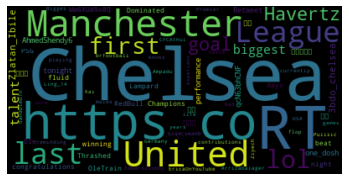

In [54]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud().generate(status_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

With bigger text document, we can get more interesting word clouds. You can explore more with bigger dataset on your own to gather more interesting insights. 

## Accessing User Information

So far, we have learnt how to find out the trending topics, how to use query terms to gather tweets, and how to use those tweets gathered to gain insights. There is another method of gathering tweets and useful information: accessing user information. 

By accessing user information, we can gain useful information such as:
   
1. Location
2. Follower count
3. Date of creation
4. Number of tweets

And many more. 

### Getting User Information

Using **users.lookup(screen_name= )**, we can access a user's information. In the argument "screen_name", we have to input the Twitter ID name that we want to access. The Twitter ID name is the name in the form of "@SocialWebMining", where the @ signifies that it is an ID. The output is a nested dictionary in a list, requiring careful navigation. 

As an example, let us try to access Cristiano Ronaldo's Twitter account. Cristiano Ronaldo's Twitter ID is @Cristiano. 

In [55]:
account = twitter_api.users.lookup(screen_name='Cristiano')

In [56]:
print(account)

[{'id': 155659213, 'id_str': '155659213', 'name': 'Cristiano Ronaldo', 'screen_name': 'Cristiano', 'location': 'Turim, Piemonte', 'description': 'This Privacy Policy addresses the collection and use of personal information - https://t.co/Jp6yh1T58c', 'url': 'https://t.co/VcAXB9ryty', 'entities': {'url': {'urls': [{'url': 'https://t.co/VcAXB9ryty', 'expanded_url': 'http://www.facebook.com/cristiano', 'display_url': 'facebook.com/cristiano', 'indices': [0, 23]}]}, 'description': {'urls': [{'url': 'https://t.co/Jp6yh1T58c', 'expanded_url': 'http://www.cristianoronaldo.com/terms', 'display_url': 'cristianoronaldo.com/terms', 'indices': [79, 102]}]}}, 'protected': False, 'followers_count': 88815845, 'friends_count': 51, 'listed_count': 83636, 'created_at': 'Mon Jun 14 19:09:20 +0000 2010', 'favourites_count': 2, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 3597, 'lang': None, 'status': {'created_at': 'Wed Oct 28 16:50:11 +0000 2020', 'id': 

We can now extract necessary information into variables of our choice. For example, let us extract the **name**, **description**, and **followers_count**. 

In [57]:
account[0].keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'status', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])

In [58]:
account_name = account[0]['name']
account_description = account[0]['description']
account_followers = account[0]['followers_count']

In [59]:
print(account_name)
print(account_description)
print(account_followers)

Cristiano Ronaldo
This Privacy Policy addresses the collection and use of personal information - https://t.co/Jp6yh1T58c
88815845


### Getting User's Tweets

Getting a user's information is good, but it would be much better to get the tweets of a user. Fortunately, the Twitter API provides such function: **statuses.user_timeline(screen_name= , count= )**

In [137]:
user_tweets = twitter_api.statuses.user_timeline(screen_name='Cristiano', count=100)

In [139]:
#print(user_tweets)

In [62]:
len(user_tweets)

100

We have gathered latest 100 tweets of Cristiano Ronaldo. In a list, there are 100 dictionaries, each dictionary containing the tweet and its corresponding information. We can do similar methods to extract the necessary information. 



In [63]:
for i in range(100):
    print()
    print(user_tweets[i]['text'])


Forza Ragazzi!
Tutti insieme! 💪🏽👏🏽
Fino Alla Fine!👊🏽 https://t.co/N3ETAJexTP

Felling good and healthy! 🤷🏽‍♂️😉
Forza Juve! 💪🏽 #finoallafine https://t.co/PWuBOSXNEH

Siiiiiiiiiii💪🏽 https://t.co/KwWODF5e6N

Let your confidence talks😉 https://t.co/Lro2Ov68nw

Thursday style! 😉 https://t.co/OlNhOit0vh

“El éxito en la vida no se mide por lo que logras, sino por los obstáculos que superas” 😉💪🏽 https://t.co/XCdeSqFv9Y

“Não deixes aquilo que não podes fazer atrapalhar o que podes fazer”😉 https://t.co/yN9rQhmEgE

Unidos dentro e fora do campo! 🇵🇹👏🏽👊🏽 #todosportugal https://t.co/4bQSUIPm2m

This World Mental Health Day let’s get stronger together.
Join me in showing your support.
 
Check out @clearhair f… https://t.co/pzqkfJ21FZ

Obrigado @nikefootball These boots are beautiful and I cannot wait to wear them for my next @selecaoportugal match… https://t.co/ckpf22NLr2

Excelente trabalho equipa!👏🏽
Continuar a trabalhar com a mesma atitude e ambição para conseguirmos o nosso objetivo… https://t

Now, we will save all of Cristiano Ronaldo's tweets into a variable since we know now how to navigate through the data structure. 

In [64]:
user_texts = [status['text'] for status in user_tweets]

In [65]:
len(user_texts)

100

In [66]:
user_texts

['Forza Ragazzi!\nTutti insieme! 💪🏽👏🏽\nFino Alla Fine!👊🏽 https://t.co/N3ETAJexTP',
 'Felling good and healthy! 🤷🏽\u200d♂️😉\nForza Juve! 💪🏽 #finoallafine https://t.co/PWuBOSXNEH',
 'Siiiiiiiiiii💪🏽 https://t.co/KwWODF5e6N',
 'Let your confidence talks😉 https://t.co/Lro2Ov68nw',
 'Thursday style! 😉 https://t.co/OlNhOit0vh',
 '“El éxito en la vida no se mide por lo que logras, sino por los obstáculos que superas” 😉💪🏽 https://t.co/XCdeSqFv9Y',
 '“Não deixes aquilo que não podes fazer atrapalhar o que podes fazer”😉 https://t.co/yN9rQhmEgE',
 'Unidos dentro e fora do campo! 🇵🇹👏🏽👊🏽 #todosportugal https://t.co/4bQSUIPm2m',
 'This World Mental Health Day let’s get stronger together.\nJoin me in showing your support.\n\xa0\nCheck out @clearhair f… https://t.co/pzqkfJ21FZ',
 'Obrigado @nikefootball These boots are beautiful and I cannot wait to wear them for my next @selecaoportugal match… https://t.co/ckpf22NLr2',
 'Excelente trabalho equipa!👏🏽\nContinuar a trabalhar com a mesma atitude e ambição

### Vectoriser with User Tweets

Same as before, we can try vectorising Cristiano Ronaldo's tweets using Count Vectoriser, TF-IDF Vectoriser, and visualising through Word Cloud. 

#### Count Vectoriser

In [67]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(user_texts)
print(vectorizer.get_feature_names())

['016hyjbov6', '0kmvfs0rup', '0kq3gdaw6i', '0lgejdbsbl', '0rpassahnh', '0ynvn2qxny', '10', '100', '1000', '14', '1plvaegs1n', '2yzfwjr6ck', '4bqsuipm2m', '50', '5mohnxtdaa', '6h2a0ocj3f', '6hzodlzvmi', '6lq1fjrma6', '74bpj1hex8', '7tmmno0to7', '7zz1ysznjp', '89cxzn3wob', '8e4pox2bmg', '8p2gjcfihf', '96', '9iqqmjbxdc', '9r7zgwigey', 'a1kwpxzoxe', 'a5ngy4floj', 'abbiamo', 'about', 'acreditar', 'active', 'again', 'ailrikt6gs', 'aj6uhzfujf', 'ajudaram', 'all', 'alla', 'almost', 'already', 'always', 'amanhã', 'amazingly', 'ambição', 'amor', 'amp', 'and', 'anos', 'another', 'anxiety', 'approved', 'aquilo', 'are', 'around', 'at', 'atingir', 'atitude', 'atrapalhar', 'average', 'azgnpkte4r', 'b69bltvjti', 'back', 'backontrack', 'bacteria', 'be', 'beat', 'beautiful', 'become', 'behind', 'best', 'bianconer', 'bike', 'birthday', 'bisogno', 'board', 'body', 'bold', 'boots', 'bqpj5frcmd', 'brand', 'brave', 'breathe', 'brother', 'build', 'but', 'campo', 'can', 'cannot', 'career', 'challenge', 'challe

In [68]:
print(x.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### TF-IDF Vectoriser

In [69]:
vectorizer = TfidfVectorizer() 
vectorizer.fit(user_texts)
print(vectorizer.vocabulary_)

{'forza': 205, 'ragazzi': 431, 'tutti': 550, 'insieme': 277, 'fino': 191, 'alla': 38, 'fine': 190, 'https': 263, 'co': 103, 'n3etajextp': 369, 'felling': 186, 'good': 224, 'and': 47, 'healthy': 246, 'juve': 287, 'finoallafine': 192, 'pwubosxneh': 424, 'siiiiiiiiiii': 465, 'kwwodf5e6n': 296, 'let': 303, 'your': 610, 'confidence': 114, 'talks': 506, 'lro2ov68nw': 320, 'thursday': 528, 'style': 495, 'olnhoit0vh': 391, 'el': 157, 'éxito': 617, 'en': 160, 'la': 297, 'vida': 574, 'no': 377, 'se': 453, 'mide': 346, 'por': 416, 'lo': 312, 'que': 427, 'logras': 313, 'sino': 467, 'los': 315, 'obstáculos': 387, 'superas': 500, 'xcdesqfv9y': 603, 'não': 383, 'deixes': 131, 'aquilo': 52, 'podes': 413, 'fazer': 181, 'atrapalhar': 58, 'yn9rqhmege': 607, 'unidos': 561, 'dentro': 132, 'fora': 203, 'do': 143, 'campo': 86, 'todosportugal': 536, '4bqsuipm2m': 12, 'this': 524, 'world': 601, 'mental': 338, 'health': 245, 'day': 128, 'get': 216, 'stronger': 492, 'together': 537, 'join': 285, 'me': 336, 'in':

In [70]:
vector = vectorizer.transform(user_texts)
print(vector.shape)

(100, 619)


#### Word Cloud

In [71]:
user_combined = ', '.join(user_texts)

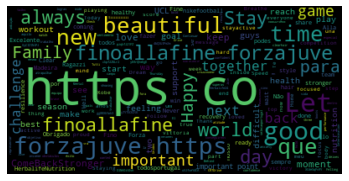

In [72]:
wordcloud = WordCloud().generate(user_combined)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Let us try to access BTS_official's Twitter account. BTS_official's Twitter ID is @bts_bighit.

In [73]:
account = twitter_api.users.lookup(screen_name='bts_bighit')
print(account)

[{'id': 1409798257, 'id_str': '1409798257', 'name': 'BTS_official', 'screen_name': 'bts_bighit', 'location': '', 'description': '#방탄소년단 공식 트위터입니다\nThis is the Official Twitter for #BTS\n\n#BTS_BE 2020.11.20\n0AM EST/ 2PM KST\n\nPre-save "BE" 👉 https://t.co/a2yuFmUSo9', 'url': 'https://t.co/UKFREoHhAr', 'entities': {'url': {'urls': [{'url': 'https://t.co/UKFREoHhAr', 'expanded_url': 'http://bts.ibighit.com', 'display_url': 'bts.ibighit.com', 'indices': [0, 23]}]}, 'description': {'urls': [{'url': 'https://t.co/a2yuFmUSo9', 'expanded_url': 'https://www.bts-be.com/', 'display_url': 'bts-be.com', 'indices': [109, 132]}]}}, 'protected': False, 'followers_count': 24830016, 'friends_count': 24, 'listed_count': 33845, 'created_at': 'Tue May 07 09:13:05 +0000 2013', 'favourites_count': 16, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 8754, 'lang': None, 'status': {'created_at': 'Wed Oct 28 15:00:15 +0000 2020', 'id': 1321466819039817728, 'id_st

In [74]:
account[0].keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'status', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])

In [75]:
account_name = account[0]['name']
account_description = account[0]['description']
account_followers = account[0]['followers_count']

In [76]:
print(account_name)
print(account_description)
print(account_followers)

BTS_official
#방탄소년단 공식 트위터입니다
This is the Official Twitter for #BTS

#BTS_BE 2020.11.20
0AM EST/ 2PM KST

Pre-save "BE" 👉 https://t.co/a2yuFmUSo9
24830016


In [140]:
user_tweets = twitter_api.statuses.user_timeline(screen_name='bts_bighit', count=100)
#print(user_tweets)

In [78]:
len(user_tweets)

100

In [79]:
for i in range(10):
    print()
    print(user_tweets[i]['text'])


Dear. ARMY 

I was waiting for the day we meet ARMY again and I scribbled down some things I want to ask you when w… https://t.co/kjkOjTVIdv

Dear. ARMY 

우리 아미 여러분들을 만나는 그날을 기다리며, 만나면 무엇을 물어볼까 끄적여봤어요. 여러분이 계신 곳까지 닿길 바라며, 이만 줄일게요.

📮 https://t.co/YMNW9EKvkS… https://t.co/F8BGhpW67j

RT @fanmakestars: [BTS POP-UP : MAP OF THE SOUL Online Store EUROPE] 
Purchasing Guide
https://t.co/bPya1fcSAb

📌Pre-sign up : 9 November 2…

Dear. ARMY 

The weather’s gotten a lot chilly. I’m writing this because I wanted to know what ARMY’s thinking and… https://t.co/k59GW370Gh

Dear. ARMY 

날씨가 많이 추워졌네요. 우리 아미 여러분들은 요즘 어떤 생각을 하고, 무얼 하며 지내는지 궁금해서 펜을 들었어요. 답장해 주실 거죠?

📮 https://t.co/C4fW7l7u3R… https://t.co/3mr6Y0ngbJ

We’re so excited to be nominated for the 2020 @AMAs! Don't miss the show, November 22nd at 8/7c on ABC! Find more i… https://t.co/tOxaidE6sk

RT @bighit_merch: BTS POP-UP : MAP OF THE SOUL Showcase in SEOUL Sketch
(https://t.co/OcTsOmi12w)
 
#BTS_POPUP #MAP_OF_THE_SOUL

[Episode] #방탄소년단 Th

In [80]:
user_texts = [status['text'] for status in user_tweets]
len(user_texts)

100

In [81]:
user_texts

['Dear. ARMY \n\nI was waiting for the day we meet ARMY again and I scribbled down some things I want to ask you when w… https://t.co/kjkOjTVIdv',
 'Dear. ARMY \n\n우리 아미 여러분들을 만나는 그날을 기다리며, 만나면 무엇을 물어볼까 끄적여봤어요. 여러분이 계신 곳까지 닿길 바라며, 이만 줄일게요.\n\n📮 https://t.co/YMNW9EKvkS… https://t.co/F8BGhpW67j',
 'RT @fanmakestars: [BTS POP-UP : MAP OF THE SOUL Online Store EUROPE] \nPurchasing Guide\nhttps://t.co/bPya1fcSAb\n\n📌Pre-sign up : 9 November 2…',
 'Dear. ARMY \n\nThe weather’s gotten a lot chilly. I’m writing this because I wanted to know what ARMY’s thinking and… https://t.co/k59GW370Gh',
 'Dear. ARMY \n\n날씨가 많이 추워졌네요. 우리 아미 여러분들은 요즘 어떤 생각을 하고, 무얼 하며 지내는지 궁금해서 펜을 들었어요. 답장해 주실 거죠?\n\n📮 https://t.co/C4fW7l7u3R… https://t.co/3mr6Y0ngbJ',
 "We’re so excited to be nominated for the 2020 @AMAs! Don't miss the show, November 22nd at 8/7c on ABC! Find more i… https://t.co/tOxaidE6sk",
 'RT @bighit_merch: BTS POP-UP : MAP OF THE SOUL Showcase in SEOUL Sketch\n(https://t.co/OcTsOmi12w)\n \n#BTS_POPUP

#### Count Vectoriser

In [82]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(user_texts)
print(vectorizer.get_feature_names())

['05', '0lkjpoem1r', '10', '1013', '12pm', '14th', '15', '15sec', '15초', '15초컷', '18r5dqnxrj', '1fzumzcf17', '1년', '1위', '1위와', '1위한', '1회차', '2018', '2019', '2020', '22', '22nd', '29', '2foplnr74q', '2번째', '2위를', '2일전', '2주', '2회차도', '3mr6y0ngbj', '3번', '3일', '4asvo1cxcu', '4년연속', '5khjccsbzr', '5l2caajxjp', '62nd', '6th', '7c', '7ifmxs9zb2', '7zsf3qwglt', '7일', '8nr0qg9uu8', '8장입니다', '9zfj587k5k', '9장이', 'abc', 'addition', 'additional', 'affair', 'ag3jhgt4mg', 'again', 'agdmaywdtk', 'al', 'albums', 'alert', 'all', 'amas', 'amazing', 'amp', 'an', 'and', 'announce', 'announced', 'announcement', 'annual', 'are', 'army', 'artist', 'asia', 'asiqmck6fj', 'ask', 'asked', 'at', 'available', 'awards', 'ax2mykbr3y', 'ayy', 'aznfqyqbgy', 'back', 'bang', 'bbmas', 'be', 'because', 'before', 'beginning', 'below', 'bewater', 'bighit_merch', 'bighitent', 'billboard', 'birthday', 'bj7kys0uew', 'black', 'box', 'bpya1fcsab', 'brazil', 'break', 'bskegcnzrl', 'bts', 'bts_', 'bts_be', 'bts_bighit', 'bts_d

In [83]:
print(x.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### TF-IDF Vectoriser

In [84]:
vectorizer = TfidfVectorizer()
vectorizer.fit(user_texts)
print(vectorizer.vocabulary_)

{'dear': 145, 'army': 67, 'was': 457, 'waiting': 454, 'for': 185, 'the': 403, 'day': 143, 'we': 459, 'meet': 272, 'again': 51, 'and': 61, 'scribbled': 360, 'down': 150, 'some': 382, 'things': 407, 'want': 455, 'to': 415, 'ask': 71, 'you': 482, 'when': 466, 'https': 221, 'co': 130, 'kjkojtvidv': 247, '우리': 720, '아미': 675, '여러분들을': 699, '만나는': 567, '그날을': 517, '기다리며': 522, '만나면': 568, '무엇을': 588, '물어볼까': 590, '끄적여봤어요': 529, '여러분이': 701, '계신': 500, '곳까지': 501, '닿길': 544, '바라며': 596, '이만': 729, '줄일게요': 750, 'ymnw9ekvks': 481, 'f8bghpw67j': 173, 'rt': 352, 'fanmakestars': 176, 'bts': 99, 'pop': 327, 'up': 437, 'map': 267, 'of': 302, 'soul': 384, 'online': 306, 'store': 393, 'europe': 169, 'purchasing': 332, 'guide': 205, 'bpya1fcsab': 95, 'pre': 328, 'sign': 371, 'november': 294, 'weather': 460, 'gotten': 200, 'lot': 257, 'chilly': 125, 'writing': 475, 'this': 409, 'because': 83, 'wanted': 456, 'know': 248, 'what': 465, 'thinking': 408, 'k59gw370gh': 245, '날씨가': 532, '많이': 572, '추워졌네요': 772

In [85]:
vector = vectorizer.transform(user_texts)
print(vector.shape)

(100, 821)


#### Word Cloud

In [86]:
user_combined = ', '.join(user_texts)

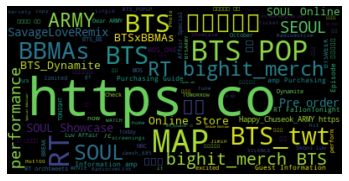

In [87]:
wordcloud = WordCloud().generate(user_combined)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Let us try to access Donald J. Trump's Twitter account. Donald J. Trump's Twitter ID is @realDonaldTrump.

In [88]:
account = twitter_api.users.lookup(screen_name='realDonaldTrump')
print(account)

[{'id': 25073877, 'id_str': '25073877', 'name': 'Donald J. Trump', 'screen_name': 'realDonaldTrump', 'location': 'Washington, DC', 'description': '45th President of the United States of America🇺🇸', 'url': 'https://t.co/8f9VFxztEJ', 'entities': {'url': {'urls': [{'url': 'https://t.co/8f9VFxztEJ', 'expanded_url': 'http://Vote.DonaldJTrump.com', 'display_url': 'Vote.DonaldJTrump.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 87358501, 'friends_count': 50, 'listed_count': 121730, 'created_at': 'Wed Mar 18 13:46:38 +0000 2009', 'favourites_count': 6, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 57776, 'lang': None, 'status': {'created_at': 'Thu Oct 29 04:11:14 +0000 2020', 'id': 1321665874173059072, 'id_str': '1321665874173059072', 'text': 'RT @realannapaulina: My new commercial is out! \n\nVote LUNA early on your absentee ballot or in-person November 3rd! https://t.co/CVJ1GHsjjM', 'truncat

In [89]:
account[0].keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'status', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])

In [90]:
account_name = account[0]['name']
account_description = account[0]['description']
account_followers = account[0]['followers_count']

In [91]:
print(account_name)
print(account_description)
print(account_followers)

Donald J. Trump
45th President of the United States of America🇺🇸
87358501


In [141]:
user_tweets = twitter_api.statuses.user_timeline(screen_name='realDonaldTrump', count=100)
#print(user_tweets)

In [93]:
len(user_tweets)

100

In [94]:
for i in range(10):
    print()
    print(user_tweets[i]['text'])


RT @realannapaulina: My new commercial is out! 

Vote LUNA early on your absentee ballot or in-person November 3rd! https://t.co/CVJ1GHsjjM

Maria is badly needed in Washington. She is an outstanding person who truly loves her Country and her State. Her op… https://t.co/DT8YLpbFHM

https://t.co/gsFSgh2KPc

Jack, this is a Great Honor. Thank you! https://t.co/60WWISm5hs

https://t.co/gsFSgh2KPc https://t.co/j7Z5jC05wP

https://t.co/4LTWLgbmsf

Why isn’t Biden corruption trending number one on Twitter? Biggest world story, and nowhere to be found. There is n… https://t.co/yuzoM94srt

A vote for Joe Biden is a vote for the biggest TAX HIKE in history, crushing regulations, slashing Medicare and Soc… https://t.co/YOv60VYljx

https://t.co/6Bww8zo4bk

If you vote for Biden, your kids will not be in school, there will be no graduations, no weddings, no Thanksgiving,… https://t.co/iKuRyGUsEf


In [95]:
user_texts = [status['text'] for status in user_tweets]
len(user_texts)

100

In [96]:
user_texts

['RT @realannapaulina: My new commercial is out! \n\nVote LUNA early on your absentee ballot or in-person November 3rd! https://t.co/CVJ1GHsjjM',
 'Maria is badly needed in Washington. She is an outstanding person who truly loves her Country and her State. Her op… https://t.co/DT8YLpbFHM',
 'https://t.co/gsFSgh2KPc',
 'Jack, this is a Great Honor. Thank you! https://t.co/60WWISm5hs',
 'https://t.co/gsFSgh2KPc https://t.co/j7Z5jC05wP',
 'https://t.co/4LTWLgbmsf',
 'Why isn’t Biden corruption trending number one on Twitter? Biggest world story, and nowhere to be found. There is n… https://t.co/yuzoM94srt',
 'A vote for Joe Biden is a vote for the biggest TAX HIKE in history, crushing regulations, slashing Medicare and Soc… https://t.co/YOv60VYljx',
 'https://t.co/6Bww8zo4bk',
 'If you vote for Biden, your kids will not be in school, there will be no graduations, no weddings, no Thanksgiving,… https://t.co/iKuRyGUsEf',
 'We will end surprise medical billing, require price transparency, lo

#### Count Vectoriser

In [97]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(user_texts)
print(vectorizer.get_feature_names())

['0be6h6u6nl', '100', '13', '1bhwlr9tjx', '2016', '30', '3anrrupttz', '3cohvb7kmp', '3rd', '3vhk5n2hfw', '401tlm5v3f', '4ltwlgbmsf', '4th', '4xyficrhxc', '60pljcbabq', '60wwism5hs', '6bww8zo4bk', '99', 'able', 'abnzhtmmk4', 'about', 'absentee', 'achieved', 'action', 'actually', 'admin', 'after', 'again', 'against', 'ago', 'all', 'allow', 'almost', 'along', 'also', 'alwa', 'amazing', 'america', 'american', 'amp', 'amy', 'an', 'and', 'anonymous', 'another', 'anti', 'any', 'anywhere', 'ao85kjmebw', 'are', 'arizona', 'as', 'associate', 'associated', 'at', 'back', 'badly', 'bail', 'ballot', 'barely', 'barrett', 'bc2h4ozhqp', 'be', 'beautiful', 'because', 'before', 'between', 'bi09aaoonw', 'biden', 'big', 'biggest', 'billing', 'blamed', 'bmzgpakt6a', 'bobulinski', 'boom', 'border', 'boston', 'bqq8tckzkm', 'breaking', 'brooklyn', 'build', 'business', 'but', 'by', 'ca', 'calls', 'campaig', 'cares', 'carried', 'cgdeqkdxgh', 'change', 'chant', 'charles', 'chicago', 'china', 'choice', 'chuckcalle

In [98]:
print(x.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### TF-IDF Vectoriser

In [99]:
vectorizer = TfidfVectorizer()
vectorizer.fit(user_texts)
print(vectorizer.vocabulary_)

{'rt': 452, 'realannapaulina': 433, 'my': 337, 'new': 347, 'commercial': 105, 'is': 255, 'out': 384, 'vote': 568, 'luna': 306, 'early': 160, 'on': 376, 'your': 620, 'absentee': 21, 'ballot': 58, 'or': 382, 'in': 247, 'person': 396, 'november': 356, '3rd': 8, 'https': 238, 'co': 102, 'cvj1ghsjjm': 125, 'maria': 314, 'badly': 56, 'needed': 343, 'washington': 572, 'she': 471, 'an': 41, 'outstanding': 385, 'who': 588, 'truly': 550, 'loves': 302, 'her': 226, 'country': 117, 'and': 42, 'state': 494, 'op': 379, 'dt8ylpbfhm': 158, 'gsfsgh2kpc': 214, 'jack': 262, 'this': 533, 'great': 210, 'honor': 235, 'thank': 525, 'you': 619, '60wwism5hs': 15, 'j7z5jc05wp': 261, '4ltwlgbmsf': 11, 'why': 590, 'isn': 257, 'biden': 68, 'corruption': 114, 'trending': 549, 'number': 360, 'one': 377, 'twitter': 553, 'biggest': 70, 'world': 604, 'story': 501, 'nowhere': 358, 'to': 541, 'be': 62, 'found': 192, 'there': 530, 'yuzom94srt': 622, 'for': 190, 'joe': 268, 'the': 528, 'tax': 517, 'hike': 228, 'history': 23

In [100]:
vector = vectorizer.transform(user_texts)
print(vector.shape)

(100, 625)


#### Word Cloud

In [101]:
user_combined = ', '.join(user_texts)

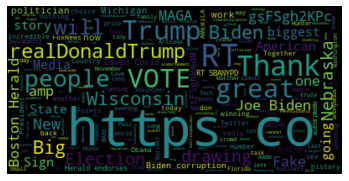

In [102]:
wordcloud = WordCloud().generate(user_combined)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Let us try to access Petr Cech's Twitter account. Petr Cech's Twitter ID is @PetrCech.

In [103]:
account = twitter_api.users.lookup(screen_name='PetrCech')
print(account)

[{'id': 2493199232, 'id_str': '2493199232', 'name': 'Petr Cech', 'screen_name': 'PetrCech', 'location': 'London, U.K', 'description': 'Technical and Performance Advisor @chelseafc', 'url': 'https://t.co/8Ns88z6UoR', 'entities': {'url': {'urls': [{'url': 'https://t.co/8Ns88z6UoR', 'expanded_url': 'http://www.petr-cech.com', 'display_url': 'petr-cech.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 1809613, 'friends_count': 395, 'listed_count': 2700, 'created_at': 'Tue May 13 16:13:52 +0000 2014', 'favourites_count': 3294, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 2670, 'lang': None, 'status': {'created_at': 'Thu Oct 22 20:09:40 +0000 2020', 'id': 1319370356394700800, 'id_str': '1319370356394700800', 'text': 'RT @VGouttebarge: Following our @TheIFAB Concussion Expert Group meeting, football is finally stepping forward for the protection of player…', 'truncated': False, 'entities': {'ha

In [104]:
account[0].keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'status', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])

In [105]:
account_name = account[0]['name']
account_description = account[0]['description']
account_followers = account[0]['followers_count']

In [106]:
print(account_name)
print(account_description)
print(account_followers)

Petr Cech
Technical and Performance Advisor @chelseafc
1809613


In [142]:
user_tweets = twitter_api.statuses.user_timeline(screen_name='PetrCech', count=100)
#print(user_tweets)

In [108]:
len(user_tweets)

99

In [109]:
for i in range(10):
    print()
    print(user_tweets[i]['text'])


RT @VGouttebarge: Following our @TheIFAB Concussion Expert Group meeting, football is finally stepping forward for the protection of player…

@MesutOzil1088 @ChelseaFC @skrapid 😅

@433 That left foot is definitely genuine 😉

RT @ChelseaFC: We're in Group E for this season's @ChampionsLeague! 👊

Thoughts on the draw? #UCLdraw https://t.co/BqUwdSanWw

Roman Abramovich recognised for his charitable work and fight against antisemitism ... https://t.co/EsTE8kUGTM

.@ceskarepre_cz  gratulace všem hráčům a trenerům k výkonu , protože i přes porážku to byl výkon , který měl parame… https://t.co/hlC8VHLO8M

RT @ChelseaFC: Happy birthday to former Blue, Carlo Cudicini! 🥳 https://t.co/uGr3QkNqjL

@Nicki48141067 @Aubameyang7 @MesutOzil1088 @LacazetteAlex @IanWright0 @LeeDixon2 @thedavidseaman @HectorBellerin… https://t.co/PhmxZ45fIo

@barakfever Un abrazo hermano 😁😉. Disfruta!

RT @ChelseaFC: Signed. Sealed. Delivered.

#HiKai 👋 https://t.co/mJGX67SPrD


In [110]:
user_texts = [status['text'] for status in user_tweets]
len(user_texts)

99

In [111]:
user_texts

['RT @VGouttebarge: Following our @TheIFAB Concussion Expert Group meeting, football is finally stepping forward for the protection of player…',
 '@MesutOzil1088 @ChelseaFC @skrapid 😅',
 '@433 That left foot is definitely genuine 😉',
 "RT @ChelseaFC: We're in Group E for this season's @ChampionsLeague! 👊\n\nThoughts on the draw? #UCLdraw https://t.co/BqUwdSanWw",
 'Roman Abramovich recognised for his charitable work and fight against antisemitism ... https://t.co/EsTE8kUGTM',
 '.@ceskarepre_cz  gratulace všem hráčům a trenerům k výkonu , protože i přes porážku to byl výkon , který měl parame… https://t.co/hlC8VHLO8M',
 'RT @ChelseaFC: Happy birthday to former Blue, Carlo Cudicini! 🥳 https://t.co/uGr3QkNqjL',
 '@Nicki48141067 @Aubameyang7 @MesutOzil1088 @LacazetteAlex @IanWright0 @LeeDixon2 @thedavidseaman @HectorBellerin… https://t.co/PhmxZ45fIo',
 '@barakfever Un abrazo hermano 😁😉. Disfruta!',
 'RT @ChelseaFC: Signed. Sealed. Delivered.\n\n#HiKai 👋 https://t.co/mJGX67SPrD',
 'RT @Chel

#### Count Vectoriser

In [112]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(user_texts)
print(vectorizer.get_feature_names())

['000', '04', '0bzjqh2ybn', '100', '11am', '13', '15', '17', '18', '1996', '1p0peqyaig', '1simo1987', '20', '2003', '2005', '2010', '2012', '2019', '21', '21st', '23fjgwr531', '29', '2wsxy2fxzt', '30', '30pm', '33', '433', '48', '56', '5th', '60', '60th', '70klsrxc1g', '76', '7axxuatxdq', '82nd', 'aap03102', 'able', 'about', 'abramovich', 'abrazo', 'acsparta_cz', 'again', 'against', 'ago', 'ai', 'alanmillergk', 'alanwm1986', 'all', 'also', 'always', 'am', 'amazing', 'an', 'and', 'andrewrobertso5', 'antidopage', 'antisemitism', 'après', 'are', 'area', 'arsenal', 'as', 'at', 'aubameyang7', 'avk1bksfi9', 'award', 'ať', 'back', 'backs', 'bad', 'ball', 'barakfever', 'bbcfootball', 'bbcmotd', 'bbcsport', 'be', 'beaucoup', 'beautiful', 'because', 'been', 'behind', 'belletti', 'best', 'billygilmourrr', 'birthday', 'bl', 'blue', 'board', 'bobwilsonbwsc', 'bolton', 'boot', 'borci', 'boss', 'bought', 'bquwdsanww', 'brankáře', 'brankářů', 'bridge', 'brilliant', 'buchtelovi', 'but', 'bxxbnex8uh', '

In [113]:
print(x.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### TF-IDF Vectoriser

In [114]:
vectorizer = TfidfVectorizer()
vectorizer.fit(user_texts)
print(vectorizer.vocabulary_)

{'rt': 476, 'vgouttebarge': 590, 'following': 229, 'our': 415, 'theifab': 540, 'concussion': 147, 'expert': 209, 'group': 262, 'meeting': 363, 'football': 231, 'is': 297, 'finally': 223, 'stepping': 516, 'forward': 234, 'for': 232, 'the': 537, 'protection': 443, 'of': 405, 'player': 432, 'mesutozil1088': 367, 'chelseafc': 132, 'skrapid': 500, '433': 26, 'that': 536, 'left': 341, 'foot': 230, 'definitely': 167, 'genuine': 249, 'we': 609, 're': 461, 'in': 291, 'this': 551, 'season': 487, 'championsleague': 128, 'thoughts': 553, 'on': 407, 'draw': 183, 'ucldraw': 576, 'https': 285, 'co': 139, 'bquwdsanww': 95, 'roman': 473, 'abramovich': 39, 'recognised': 463, 'his': 275, 'charitable': 129, 'work': 628, 'and': 54, 'fight': 221, 'against': 43, 'antisemitism': 57, 'este8kugtm': 203, 'ceskarepre_cz': 122, 'gratulace': 259, 'všem': 603, 'hráčům': 284, 'trenerům': 567, 'výkonu': 601, 'protože': 445, 'přes': 452, 'porážku': 435, 'to': 560, 'byl': 104, 'výkon': 600, 'který': 330, 'měl': 383, 'pa

In [115]:
vector = vectorizer.transform(user_texts)
print(vector.shape)

(99, 650)


#### Word Cloud

In [116]:
user_combined = ', '.join(user_texts)

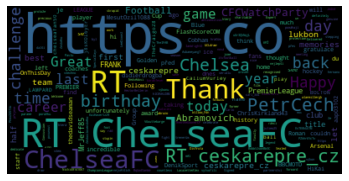

In [117]:
wordcloud = WordCloud().generate(user_combined)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Let us try to access BLACKPINK GLOBAL BLINK's Twitter account. BLACKPINK GLOBAL BLINK's Twitter ID is @ygofficialblink.

In [118]:
account = twitter_api.users.lookup(screen_name='ygofficialblink')
print(account)

[{'id': 878204370403250176, 'id_str': '878204370403250176', 'name': 'BLACKPINK GLOBAL BLINK', 'screen_name': 'ygofficialblink', 'location': '', 'description': 'YG ENTERTAINMENT #BLACKPINK OFFICIAL BLINK TWITTER l #블랙핑크 팬클럽 블링크 공식 트위터입니다.', 'url': 'https://t.co/c2mkxA118z', 'entities': {'url': {'urls': [{'url': 'https://t.co/c2mkxA118z', 'expanded_url': 'https://blink.blackpinkofficial.com/', 'display_url': 'blink.blackpinkofficial.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 5541095, 'friends_count': 6, 'listed_count': 5799, 'created_at': 'Fri Jun 23 10:53:32 +0000 2017', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 1327, 'lang': None, 'status': {'created_at': 'Thu Oct 29 02:00:40 +0000 2020', 'id': 1321633018289647616, 'id_str': '1321633018289647616', 'text': 'RT @ygent_official: The world-famous\xa0K-POP\xa0girl group @BLACKPINK brings you a chic and stylish

In [119]:
account[0].keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'status', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])

In [120]:
account_name = account[0]['name']
account_description = account[0]['description']
account_followers = account[0]['followers_count']

In [121]:
print(account_name)
print(account_description)
print(account_followers)

BLACKPINK GLOBAL BLINK
YG ENTERTAINMENT #BLACKPINK OFFICIAL BLINK TWITTER l #블랙핑크 팬클럽 블링크 공식 트위터입니다.
5541095


In [143]:
user_tweets = twitter_api.statuses.user_timeline(screen_name='ygofficialblink', count=100)
#print(user_tweets)

In [123]:
len(user_tweets)

100

In [124]:
for i in range(10):
    print()
    print(user_tweets[i]['text'])


RT @ygent_official: The world-famous K-POP girl group @BLACKPINK brings you a chic and stylish theme!  

👉 https://t.co/18B5wAxPYb

#BLACKP…

RT @kpop_sbs: [🎥#단독샷캠] 블랙핑크

#인기가요 #블랙핑크 #BLACKPINK #LovesickGirls #PrettySavage @BLACKPINK

💖Lovesick Girls
•201025: https://t.co/n8Z1ZzeS…

RT @ygent_official: Do you find yourself humming 'Lovesick Girls' like I do? 🎧  
Get the iconic new @BLACKPINK looks, and let's dance! 🖤💕…

RT @SuperStar_YG: First news!
#SuperStarYG pre-register begins today!

Spread the words!

☞https://t.co/nm6PzIKkzi
#SECHSKIES #BIGBANG #AKM…

RT @SuperStar_YG: 첫 번째 뉴~스
지금 #SuperStarYG 사전예약 시작을 알려드립니다!

#슈스와 공식 트위터를 팔로우해주신 여러분들께 먼저 알려드리는 겁니다.
그러니까 자랑(?) 스럽게 팍팍 소문 내주세요!
☞https://t.…

RT @sbsnoriter: 💫201025 인기가요 PD노트

3주 연속 1위로 트로피를 거머쥔 블랙핑크🖤❤
블링크를 심쿵하게 만들 블핑이들의 무대 현장사진٩(๑˃̵ᴗ˂̵)و

MORE📸 https://t.co/flJVNdEDhA

#인기가요 #in…

RT @SuperStar_YG: [SuperStar YG] #blackpink in your area!
#BLACKPINK with the pre-register news!

3 winners among the retweets will get [Si…

RT @Sup

In [125]:
user_texts = [status['text'] for status in user_tweets]
len(user_texts)

100

In [126]:
user_texts

['RT @ygent_official: The world-famous\xa0K-POP\xa0girl group @BLACKPINK brings you a chic and stylish theme!\xa0\xa0\n\n👉 https://t.co/18B5wAxPYb\n\n#BLACKP…',
 'RT @kpop_sbs: [🎥#단독샷캠] 블랙핑크\n\n#인기가요 #블랙핑크 #BLACKPINK #LovesickGirls #PrettySavage @BLACKPINK\n\n💖Lovesick Girls\n•201025: https://t.co/n8Z1ZzeS…',
 "RT @ygent_official: Do you find yourself humming 'Lovesick Girls' like I do? 🎧  \nGet the iconic new @BLACKPINK looks, and let's dance! 🖤💕…",
 'RT @SuperStar_YG: First news!\n#SuperStarYG pre-register begins today!\n\nSpread the words!\n\n☞https://t.co/nm6PzIKkzi\n#SECHSKIES #BIGBANG #AKM…',
 'RT @SuperStar_YG: 첫 번째 뉴~스\n지금 #SuperStarYG 사전예약 시작을 알려드립니다!\n\n#슈스와 공식 트위터를 팔로우해주신 여러분들께 먼저 알려드리는 겁니다.\n그러니까 자랑(?) 스럽게 팍팍 소문 내주세요!\n☞https://t.…',
 'RT @sbsnoriter: 💫201025 인기가요 PD노트\n\n3주 연속 1위로 트로피를 거머쥔 블랙핑크🖤❤\n블링크를 심쿵하게 만들 블핑이들의 무대 현장사진٩(๑˃̵ᴗ˂̵)و\n\nMORE📸 https://t.co/flJVNdEDhA\n\n#인기가요 #in…',
 'RT @SuperStar_YG: [SuperStar YG] #blackpink in your area!\n#BLACKPINK with the pre-registe

#### Count Vectoriser

In [127]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(user_texts)
print(vectorizer.get_feature_names())

['0505', '10', '1011', '1018', '1025', '10대의', '15', '16', '16oszdnaxe', '18b5waxpyb', '1f4nv8if4d', '1stfullalbum', '1thek', '1시', '1열에서', '1위', '1위로', '1위를', '1위한', '200', '2001018', '201010', '201017', '201025', '2020', '20201', '20201021_7pmkst', '21', '21st', '24', '24_365_with_blac', '24_365_with_black', '2nupsuaepn', '2주', '300', '30분', '365', '3k2syyopp0', '3년', '3분께는', '3시', '3시간', '3주', '40분', '4itobzmega', '4k', '54sfpin48y', '5txxpsgons', '5시', '600', '6nkeowkk7w', '7ldmuzldja', '7pm', '7시', '8dxg5e1jbk', '8qvf5w5pjz', '95zxwukmbh', '9시', 'abc', 'abeepnypn3', 'about', 'acbre1ygbs', 'aeaxbv6u9b', 'aglzf35u1s', 'akm', 'album', 'all', 'always', 'among', 'amp', 'and', 'ardm30hkiz', 'are', 'area', 'around', 'artists', 'b8cvfbab09', 'back', 'be', 'begins', 'behindtherecord', 'bgm으로', 'bigbang', 'billion', 'black', 'blackp', 'blackpink', 'blackpinkinyourarea', 'blackpinkongma', 'blackpinkonkimmel', 'blink', 'blinks', 'boombayah', 'brand', 'brings', 'but', 'c2fjj0e3iy', 'can', 'cat

In [128]:
print(x.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### TF-IDF Vectoriser

In [129]:
vectorizer = TfidfVectorizer()
vectorizer.fit(user_texts)
print(vectorizer.vocabulary_)

{'rt': 280, 'ygent_official': 373, 'the': 317, 'world': 368, 'famous': 129, 'pop': 262, 'girl': 144, 'group': 151, 'blackpink': 86, 'brings': 94, 'you': 375, 'chic': 101, 'and': 70, 'stylish': 306, 'theme': 321, 'https': 165, 'co': 102, '18b5waxpyb': 9, 'blackp': 85, 'kpop_sbs': 193, '단독샷캠': 413, '블랙핑크': 464, '인기가요': 549, 'lovesickgirls': 215, 'prettysavage': 267, 'lovesick': 211, 'girls': 145, '201025': 23, 'n8z1zzes': 231, 'do': 119, 'find': 135, 'yourself': 377, 'humming': 166, 'like': 200, 'get': 143, 'iconic': 172, 'new': 234, 'looks': 206, 'let': 196, 'dance': 115, 'superstar_yg': 308, 'first': 136, 'news': 235, 'superstaryg': 309, 'pre': 264, 'register': 273, 'begins': 79, 'today': 329, 'spread': 300, 'words': 367, 'nm6pzikkzi': 237, 'sechskies': 289, 'bigbang': 82, 'akm': 64, '번째': 456, '지금': 575, '사전예약': 483, '시작을': 501, '알려드립니다': 518, '슈스와': 499, '공식': 395, '트위터를': 603, '팔로우해주신': 606, '여러분들께': 529, '먼저': 442, '알려드리는': 517, '겁니다': 393, '그러니까': 398, '자랑': 557, '스럽게': 500, '팍팍':

In [130]:
vector = vectorizer.transform(user_texts)
print(vector.shape)

(100, 634)


#### Word Cloud

In [131]:
user_combined = ', '.join(user_texts)

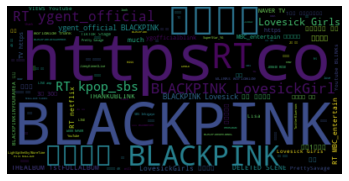

In [132]:
wordcloud = WordCloud().generate(user_combined)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Conclusion

#### 2016707079 하상천

                                                                                                


- 이번 lab은 SNS Scraping을 하는 것이었다. 트위터 API를 사용하기 위해, 권한이 있는 key로 초기화하고 미국과 전세계의 trend에 대해 알아보았다. 수업시간에 배운 json_normalize를 통해 dictionary 형태의 파일을 보기 쉽게 접근 할 수 있었다.

- 트위터 API 중 search.tweets(q='#PremierLeague', count=100) 라는 함수를 통해 #PremierLeague 라는 hashtag를 포함한 tweets 을 count 개수 만큼 얻을 수 있었다. 그리고 얻어 온 tweets 의 text와 좋아요 수 , 리트윗 수를 확인해보았다. 마찬가지로 평소에 관심이 많았던 잉글랜드 축구 팀 Chelsea에 대해서도 확인해보았다. 또한 수업시간에 배웠던 Count Vectorisation 과 TF-IDF Vectorisation 방법을 이용하여 Text Vectorisation을 하였다. tweets 의 text를 join함수를 통해 하나의 string으로 합치고 word cloud를 plot하여 눈으로 확인해보았다. data가 많지 않아 리트윗할 때 나오는 RT나, https 같은 것들이 집중적으로 나오긴 하였지만 data를 많이 모아서 진행해본다면 더 유의미한 정보를 얻을 수 있을 것 같다.

- 트위터 API 중 users.lookup(screen_name='') 라는 함수를 통해 세계적인 축구선수 호날두, K-POP의 중심인 BTS와 Blackpink, 현재 미국 대통령인 도널드 트럼프,  좋아하는 잉글랜드 축구팀 첼시의 레전드 골키퍼 체흐 까지 다섯 개의 twitter ID를 통해 user의 정보들을 얻어 보았다. 우선 이름과, 자기소개, 팔로우 수를 확인해보았고, user가 작성한 tweets 의 text를 list로 모아서 앞의 과정에서 진행해본 것 처럼 Count Vectorisation 과 TF-IDF Vectorisation 방법을 이용하여 Text Vectorisation을 하였다. 또한 list로 모은 text들을 join함수를 통해 하나의 string으로 합치고 word cloud를 plot하여 눈으로 확인해보았다.

- 이번 lab을 하면서 web crawling 뿐만 아니라 SNS의 정보도 가져올 수 있다는 것을 알게 되었고, 평소에 관심있었던 주제와 인물들의 twitter 정보들을 가져와서 재미있었던 것 같다. 다음의 기회가 된다면 instagram이나 facebook에서 scraping 하는 것도 재미있을 것 같다.